In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models import *
import json
from random import sample
import util
import matplotlib.pyplot as plt

In [3]:
inFile = open("bfast.json",'r')
meals_1 = json.load(inFile)["results"]
inFile = open("main_course.json",'r')
meals_2 = json.load(inFile)["results"]
meals = meals_1 + meals_2
bfast_meal_objs = [Meal(meal) for meal in meals_1]
main_meal_objs = [Meal(meal) for meal in meals_2]

In [4]:
for meal in meals:
    if meal["id"] == 157344:
        print(Meal(meal))
        

title: Spicy Salad with Kidney Beans, Cheddar, and Nuts
restrictions: ['gluten free', 'lacto ovo vegetarian']
nutrition: [35.97, 75.89, 70.11, 17.07, 12.1, 5.38, 10.0, 15.29, 53.48]
ingredients: [(12061, 15.0), (9037, 0.5), (2069, 5.0), (1009, 30.0), (16033, 113.0), (21052, 150.0), (4053, 10.0), (12585, 15.0), (11955, 2.0), (1026168, 2.0)]
categories: ['side dish', 'lunch', 'main course', 'salad', 'main dish', 'dinner']
cuisines: []
cook time: 10


In [5]:
calories = []
for i, bfast in enumerate(meals_1):
    bfast_ = bfast["nutrition"]["nutrients"]
    if bfast_[0]["name"] == "Calories":
        calories.append(bfast_[0]["amount"])
    else:
        print(i)

calories2 = []
for i, bfast in enumerate(meals_2):
    bfast_ = bfast["nutrition"]["nutrients"]
    if bfast_[0]["name"] == "Calories":
        calories2.append(bfast_[0]["amount"])
    else:
        print(i)

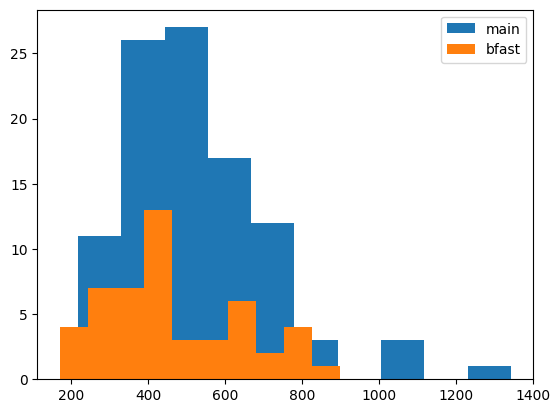

In [6]:
plt.hist(calories2, label = "main")
plt.hist(calories, label = "bfast")
plt.legend()

### Aggregate Ingredients

In [4]:
aggregate = {}
names = set()
for meal in meals:
    for ingredient in meal["nutrition"]["ingredients"]:
        if ingredient["id"] not in aggregate:
            aggregate[ingredient["id"]] = 0
        aggregate[ingredient["id"]] += ingredient["amount"]
        names.add(ingredient["name"])

In [5]:
names

{'.5 fl. oz. water',
 '.5 oz. ginger',
 '.8 lb. pork shoulder',
 '2 tablespoons pineapple juice (juice from canned pineapple)',
 'a cauliflower',
 'a semi-smoked sausage',
 'acorn squash',
 'add pepper',
 'additional toppings: avocado',
 'agave',
 'agave nectar',
 'all purpose flour',
 'almond extract',
 'almond meal',
 'almond milk',
 'almonds',
 'already quinoa',
 'ancho chile powder',
 'angel hair pasta',
 'another slug of blood orange olive oil',
 'apple',
 'apple chunks',
 'apple cider vinegar',
 'applesauce',
 'apricots',
 'artichoke',
 'arugula',
 'arënkha msc caviar substitute',
 'asparagus',
 'asparagus spears',
 'avocado',
 'avocados',
 'avocados into cubes',
 'baby arugula',
 'baby beets',
 'baby bella mushrooms',
 'baby brussell sprouts',
 'baby carrots',
 'baby carrots 4 stalks celery 1 can mushrooms 1 piece pepper 1 cup flour and 3 tbsp 2 tablespoons bee',
 'baby kale',
 'baby portabella mushrooms',
 'baby spinach',
 'bacon',
 'bacon bits',
 'baking potatoes',
 'baking po

In [ ]:
len(aggregate)

476

In [ ]:
ingredients = {}
for id_ in aggregate:
    ingredients[id_] = aggregate[id_]

In [ ]:
ingredients

{1009040: 0.25,
 10018617: 2.0,
 16223: 1.0,
 9316: 14.969999999999999,
 1119: 4.0,
 12195: 2.0,
 93607: 8.06,
 9040: 8.25,
 12006: 4.25,
 11233: 7.09,
 9176: 4.96,
 98932: 0.5,
 9266: 150.63,
 2050: 1.71,
 11485: 2.5,
 1159: 5.0,
 1226: 1.0,
 1085: 5.31,
 10211821: 117.97999999999999,
 11090: 6.91,
 11156: 4.0,
 1011077: 2.38,
 1123: 38.989999999999995,
 10011821: 0.33,
 1102047: 29.0,
 1001009: 2.88,
 11529: 20.75,
 99075: 1.0,
 2010: 4.58,
 10014412: 4.5,
 16098: 3.25,
 20081: 2.83,
 19296: 22.02,
 1090: 0.5,
 2047: 20.13,
 14412: 169.71999999999997,
 18375: 0.5,
 10016223: 0.67,
 10819297: 0.25,
 10018029: 4.0,
 10211215: 15.12,
 1001: 5.17,
 1012042: 1.5,
 11260: 40.16,
 11677: 7.75,
 10011959: 0.5,
 11457: 2.5,
 1125: 3.0,
 2017: 0.56,
 9150: 1.0,
 18075: 8.0,
 15077: 4.0,
 6971: 1.7200000000000002,
 8402: 2.25,
 19165: 3.0,
 19912: 2.21,
 16097: 1.0,
 10012023: 1.25,
 98846: 1.0,
 98863: 1.0,
 98874: 0.5,
 98994: 1.5,
 12014: 1.0,
 11143: 2.33,
 18079: 1.3,
 18439: 2.0,
 93802: 

Meal Nutrition Stats

In [ ]:
meals[0]["nutrition"]["nutrients"]

[{'name': 'Calories',
  'amount': 457.05,
  'unit': 'kcal',
  'percentOfDailyNeeds': 22.85},
 {'name': 'Fat', 'amount': 9.94, 'unit': 'g', 'percentOfDailyNeeds': 15.29},
 {'name': 'Saturated Fat',
  'amount': 2.7,
  'unit': 'g',
  'percentOfDailyNeeds': 16.88},
 {'name': 'Carbohydrates',
  'amount': 73.06,
  'unit': 'g',
  'percentOfDailyNeeds': 24.35},
 {'name': 'Net Carbohydrates',
  'amount': 68.54,
  'unit': 'g',
  'percentOfDailyNeeds': 24.92},
 {'name': 'Sugar', 'amount': 52.28, 'unit': 'g', 'percentOfDailyNeeds': 58.09},
 {'name': 'Cholesterol',
  'amount': 11.35,
  'unit': 'mg',
  'percentOfDailyNeeds': 3.78},
 {'name': 'Sodium',
  'amount': 400.9,
  'unit': 'mg',
  'percentOfDailyNeeds': 17.43},
 {'name': 'Protein',
  'amount': 20.62,
  'unit': 'g',
  'percentOfDailyNeeds': 41.25},
 {'name': 'Vitamin C',
  'amount': 66.04,
  'unit': 'mg',
  'percentOfDailyNeeds': 80.05},
 {'name': 'Calcium',
  'amount': 748.7,
  'unit': 'mg',
  'percentOfDailyNeeds': 74.87},
 {'name': 'Vitamin

In [ ]:
def parse_nutrition(nutrients):
    temp = {}
    for i in range(len(nutrients)):
        temp[nutrients[i]["name"].lower()] = nutrients[i]["percentOfDailyNeeds"]
    return [temp.get(util.NUTRIENTS_LIST[i], 0) for i in range(len(util.NUTRIENTS_LIST))]
start = np.array([0] * len(util.NUTRIENTS_LIST), dtype=float)
for meal in meals:
    start += np.array(parse_nutrition(meal["nutrition"]["nutrients"]))
start /= len(meals)

In [ ]:
start

array([25.2162    , 30.1312    , 33.916     , 18.49613333, 16.5736    ,
       16.2698    , 34.57886667, 32.39746667, 59.36673333])

User setup

In [ ]:
preferences = {"indian": 1.0, "japanese": 0.7, "thai": 0.5, "mediterranean": 0.9}
restrictions = ["vegetarian"]

mealTypes = [True, True, True]

In [ ]:
user = User([], [0, 0, 0], [], {}, mealTypes, [], {})
if "vegan" in restrictions:
    meals_ = [meal for meal in meals if meal["vegan"]]
elif "vegetarian" in restrictions:
    meals_ = [meal for meal in meals if meal["vegetarian"]]
if "glutenFree" in restrictions:
    meals_ = [meal for meal in meals_ if meal["glutenFree"]]
if "dairyFree" in restrictions:
    meals_ = [meal for meal in meals_ if meal["dairyFree"]]
meals_ = [meal for meal in meals_ if "breakfast" in meal["dishTypes"] and mealTypes[0] or "lunch" in meal["dishTypes"] and mealTypes[1] or "dinner" in meal["dishTypes"] and mealTypes[2]]
mealplan = MealPlan(sample(meals_, 21), mealTypes, restrictions)

In [ ]:
aggregate = {}
for meal in mealplan.meals:
    for ingredient in meal.ingredients:
        aggregate[ingredient[0]] = aggregate.get(ingredient[0], 0) + ingredient[1]
print(aggregate)

{1256: 0.38, 1124: 3.25, 20080: 0.25, 18372: 0.56, 1002050: 0.5, 19335: 1.75, 2047: 4.97, 98946: 0.17, 9316: 7.8, 1053: 1.0, 11090: 1.0, 11156: 2.0, 1011077: 2.38, 1123: 8.0, 10011821: 0.33, 1102047: 5.0, 1001009: 0.5, 11529: 3.33, 10011531: 3.63, 10511297: 0.75, 11215: 2.5, 4053: 4.72, 11120420: 3.5, 11821: 0.75, 1019: 0.17, 12147: 0.08, 10011282: 0.5800000000000001, 10011457: 1.67, 14412: 62.0, 99024: 0.33, 11165: 0.25, 16070: 0.25, 9176: 0.38, 10211821: 2.0, 1002068: 0.06, 8121: 1.0, 1001119: 6.0, 1077: 0.33, 9003: 1.0, 9040: 2.25, 9078: 2.0, 12155: 1.06, 9037: 0.13, 10311529: 1.0, 9433: 0.25, 11233: 2.5, 20035: 0.5, 11001: 0.25, 1006615: 0.5, 10018029: 2.0, 10211215: 0.5, 1001: 0.5, 1159: 1.0, 1012042: 0.5, 11260: 20.0, 11677: 2.0, 1011256: 0.17, 2050: 0.63, 10020080: 0.17, 9042: 0.13, 9050: 0.38, 14292: 0.5, 9302: 0.13, 2009: 0.5, 8120: 0.5, 1009: 4.0, 11291: 2.0, 10116098: 1.0, 9265: 1.0, 10012023: 1.0, 98846: 1.0, 12006: 3.25, 98863: 1.0, 98874: 0.5, 98994: 1.5, 12014: 1.0, 2004

In [ ]:
ingredients2 = aggregate.copy()
# ingredients2[11233] -= 3

In [ ]:
mealplan.ingredient_cost(ingredients2)

0.0

In [ ]:
User.calculate_goal_dv()
mealplan.nutrition_cost(User.dv)

533.6142130894857

In [ ]:
print(ingredients)

{1009040: 0.25, 10018617: 2.0, 16223: 1.0, 9316: 14.969999999999999, 1119: 4.0, 12195: 2.0, 93607: 8.06, 9040: 8.25, 12006: 4.25, 11233: 7.09, 9176: 4.96, 98932: 0.5, 9266: 150.63, 2050: 1.71, 11485: 2.5, 1159: 5.0, 1226: 1.0, 1085: 5.31, 10211821: 117.97999999999999, 11090: 6.91, 11156: 4.0, 1011077: 2.38, 1123: 38.989999999999995, 10011821: 0.33, 1102047: 29.0, 1001009: 2.88, 11529: 20.75, 99075: 1.0, 2010: 4.58, 10014412: 4.5, 16098: 3.25, 20081: 2.83, 19296: 22.02, 1090: 0.5, 2047: 20.13, 14412: 169.71999999999997, 18375: 0.5, 10016223: 0.67, 10819297: 0.25, 10018029: 4.0, 10211215: 15.12, 1001: 5.17, 1012042: 1.5, 11260: 40.16, 11677: 7.75, 10011959: 0.5, 11457: 2.5, 1125: 3.0, 2017: 0.56, 9150: 1.0, 18075: 8.0, 15077: 4.0, 6971: 1.7200000000000002, 8402: 2.25, 19165: 3.0, 19912: 2.21, 16097: 1.0, 10012023: 1.25, 98846: 1.0, 98863: 1.0, 98874: 0.5, 98994: 1.5, 12014: 1.0, 11143: 2.33, 18079: 1.3, 18439: 2.0, 93802: 0.33, 6168: 4.42, 10115136: 0.33, 4025: 0.34, 11282: 10.42, 11297:

In [ ]:
mealplan.preference_cost(preferences)

-0.9

In [ ]:
type(mealplan.meals[0].nutrition)

list

In [ ]:
for meal in mealplan.meals:
    print(meal.cuisines)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['middle eastern']
[]
[]
[]
['mediterranean', 'european', 'greek']
['english', 'scottish', 'british', 'european']


In [ ]:
mealplan.total_cost(preferences, ingredients2, User.dv)

1260.7142130894858